C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

0.692708333333
0    130
1     62
Name: label, dtype: int64
0.3229166666666667
0.6770833333333333
0.6770833333333333
0    0.677083
Name: label, dtype: float64
True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Predict : [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
[[118  12]
 [ 47  15]]
TP :  15
TN :  118
FP :  47
FN :  12
0.692708333333
0.692708333333
0.307291666667
0.307291666667
0.241935483871
0.241935483871
0.907692307692
0.0923076923077
0.555555555556
0.555555555556
[0 0 0 0 0 0 0 1 0 1]
[[ 0.63247571  0.36752429]
 [ 0.71643656  0.28356344]
 [ 0.71104114  0.28895886

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


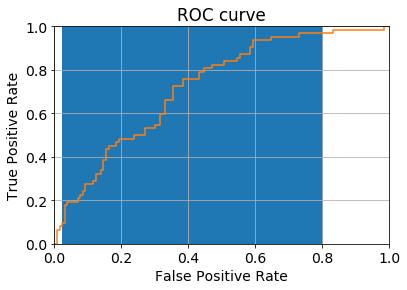

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import binarize


#Classification Accuracy metrics pros and cons
#Diabetes database available at following url is used.For sake of proxy,it is stored at the given location
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
#r added before location address to allow spaces in between address
location = r"C:\Users\sj141366\jupyter notebook\Scikit_Learn Kaggle Video Tutorial\pima_indians_Diabetes\pima-indians-diabetes.data"

#Column headers
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv(location,header=None,names=col_names)

#print first 5 instances of dataset
print(pima.head())

#So the Question becomes
#Can We predict Diabetes Status of patient given their health measurements
#Considering features as pregnant,insulin,bmi,age
featureCols = ['pregnant','insulin','bmi','age']
X = pima[featureCols]
y = pima.label

#using train test split and logistic regression
XTrain,XTest,yTrain,yTest = train_test_split(X,y,random_state=0)
logreg = LogisticRegression()
logreg.fit(XTrain,yTrain)

yPredict = logreg.predict(XTest)

#Now calculating percentage accuracy 
print()
print(metrics.accuracy_score(yTest,yPredict))

#For classification accuracy it is important to compare given accuracy with null accuracy
#Null accuracy is nothing but accuracy achieved by predicting value equal to
#most frequently occuring class value,Thus it will be most accurate over dataset
#Calculating null accuracy over test dataset

#Since classifictaion proble with only 0/1 as label,Calculate count of each
print(yTest.value_counts())

#mean will give percentage of 1 in dataset
print(yTest.mean())
#calculate percentage of zeros
print(1 - yTest.mean())

#Finding null accuracy
print(max(yTest.mean(),1 - yTest.mean()))

#for multi class clasification problem
print(yTest.value_counts().head(1) / len(yTest))

#Classification accuracy also doesn't tells what kind of error model is making
print("True: ",yTest.values[0:25])
print("Predict :",yTest.values[0:25])

#Since classification accuracy cannot tell kind of error it is making, Confusion matrix is used
print(metrics.confusion_matrix(yTest,yPredict))
#Confusion matrix shows values as [ TN FP
#                                   FN TP]

confusion = (metrics.confusion_matrix(yTest,yPredict))
#[[118  12]
# [ 47  15]]

#number of instances for each possiblities
TP = confusion[1,1]
print("TP : ",confusion[1,1])
TN = confusion[0,0]
print("TN : ",confusion[0,0])
FP = confusion[0,1]
print("FP : ",confusion[1,0])
FN = confusion[1,0]
print("FN : ",confusion[0,1])
#TP :  15
#TN :  118
#FP :  12
#FN :  47

#Confusion metrics allowed us to calculate different metrics
#1.Classification Accuracy:
print(metrics.accuracy_score(yTest,yPredict))#Ans: 0.692708333333
print((TP + TN)/(TP+TN+FP+FN))#Ans : 0.692708333333

#2.Classification Error/Misclassfication Rate:
print(1 - metrics.accuracy_score(yTest,yPredict))#Ans: 0.307291666667
print((FP + FN)/(TP+TN+FP+FN))#Ans : 0.307291666667

#3.Sensitivity/True positive rate/Recall:
print(metrics.recall_score(yTest,yPredict))#Ans : 0.241935483871
print(TP/(TP+FN))#Ans : 0.241935483871

#4.Specificity: 
print(TN/(TN+FP))#Ans : 0.907692307692

#5.False Positive Rate: 
print(FP/(TN+FP))#Ans : 0.0923076923077

#6.Precision: 
print(metrics.precision_score(yTest,yPredict))#Ans : 0.555555555556
print(TP/(TP+FP))#Ans : 0.555555555556

#How beneficial is Adjusting classification threshold
print(logreg.predict(XTest)[:10])

#Predicting probability gives likelihood of instance to belong to particular class
print(logreg.predict_proba(XTest)[:10,:])

#Fetching probability of first 10 instances to be in class 1
print(logreg.predict_proba(XTest)[:10,1])

yPredictProb = logreg.predict_proba(XTest)[:,1]

plt.rcParams['font.size'] = 14

#histogram for predicted probabilities
plt.hist(yPredictProb,bins=8)
plt.xlim(0,1)
plt.title("Predicted Probabilities")
plt.xlabel("probabilities")
plt.ylabel("Frequency")


#Changing the threshold level changes sensitivity and specificity of model
#Here changing threshold to 0.3
yPredictClass = binarize(yPredictProb,0.3)[0]

#again printing above values for comparing changes
print(yPredictProb[:10])

#Now with threshold changes
print(yPredictClass[:10])

#confusion matrix with default threshold(0.5)
print(confusion)

#with lower threshold
newConfusion = metrics.confusion_matrix(yTest,yPredictClass)
print(newConfusion)

#number of instances for each possiblities
newTP = newConfusion[1,1]
print("TP : ",newConfusion[1,1])
newTN = newConfusion[0,0]
print("TN : ",newConfusion[0,0])
newFP = newConfusion[0,1]
print("FP : ",newConfusion[1,0])
newFN = newConfusion[1,0]
print("FN : ",newConfusion[0,1])


#current and new Sensitivity
currSense = (TP/(TP+FN))#Ans: 0.241935483871
newSense = (newTP/(newTP+newFN))#Ans : 0.741935483871
print(currSense)
print(newSense)

#Current and new Specificity
currSpec = (TN/(TN+FP))#Ans: 0.907692307692
newSpec = (newTN/(newTN+newFP))#Ans : 0.615384615385
print(currSpec)
print(newSpec)

#To see results of various thresholds over sensitivity and specificity,ROC curve is used
#First parameter => True value
#Second Parameter => probability model with default threshold 
fpr,tpr,threshold = metrics.roc_curve(yTest,yPredictProb)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

#Area under the ROC curve
print(metrics.roc_auc_score(yTest,yPredictProb))#Ans : 0.724565756824

print(cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean())#Ans : 0.737823361823